In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats


Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:38<00:00, 29.4MB/s]
100% 1.06G/1.06G [00:38<00:00, 29.5MB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [ ]:
train='/content/train'

In [ ]:
import os
dog_folder = os.path.join(train, 'dogs')
cat_folder = os.path.join(train, 'cats')

# Count the number of files in each folder
num_dog_images = len(os.listdir(dog_folder))
num_cat_images = len(os.listdir(cat_folder))

print(f"Number of dog images: {num_dog_images}")
print(f"Number of cat images: {num_cat_images}")

Number of dog images: 10000
Number of cat images: 10000


In [ ]:
train_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)

)
validation_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
def process(image,label):
  image=tf.cast(image/255., tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds=validation_ds.map(process)

In [ ]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(256,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,819,393 (26.01 MB)

 Trainable params: 6,819,393 (26.01 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 72s 94ms/step - accuracy: 0.5318 - loss: 0.6829 - val_accuracy: 0.6980 - val_loss: 0.5653
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 77ms/step - accuracy: 0.7244 - loss: 0.5413 - val_accuracy: 0.7780 - val_loss: 0.4659
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 84ms/step - accuracy: 0.7941 - loss: 0.4403 - val_accuracy: 0.8022 - val_loss: 0.4295
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 91ms/step - accuracy: 0.8349 - loss: 0.3650 - val_accuracy: 0.8412 - val_loss: 0.3657
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 89ms/step - accuracy: 0.8707 - loss: 0.3037 - val_accuracy: 0.8416 - val_loss: 0.3932
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9065 - loss: 0.2310Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 84ms/step - accuracy: 0.9293 - loss: 0.1757 - val_accuracy: 0.8398 - val_loss: 0.5209
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 79ms/step - accuracy: 0.9547 - loss: 0.1139 - val_accuracy: 0.8386 - val_loss: 0.5900
Epoc

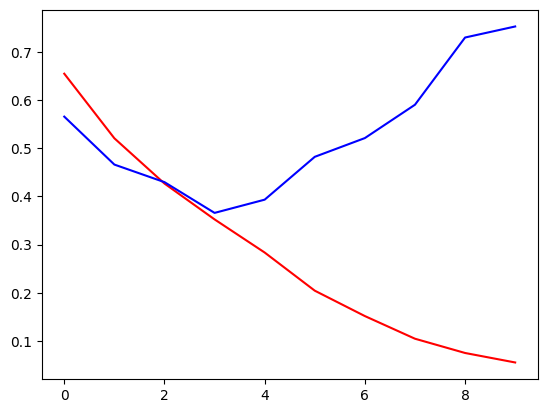

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'], color ='blue',label='test')

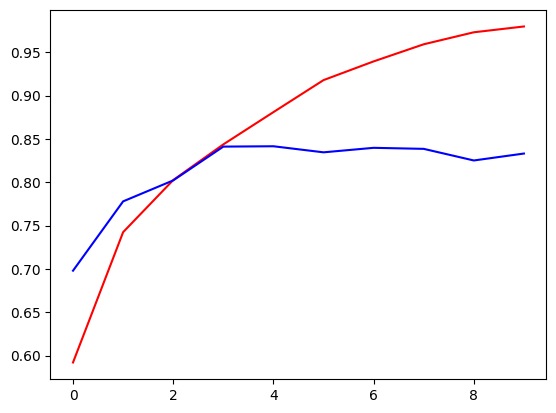

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')

In [ ]:
import cv2

In [ ]:
test_img=cv2.imread('/content/dog.png')

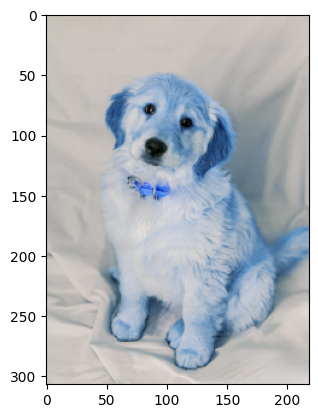

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(307, 218, 3)

In [ ]:
test_img=cv2.resize(test_img,(256,256))

In [ ]:
test_input=test_img.reshape(1,256,256,3)

In [ ]:
predicted_class=model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [ ]:
class_names = ['cat', 'dog']

In [ ]:

img=load_img('/content/test/cats/cat.10.jpg',target_size=(256,256))

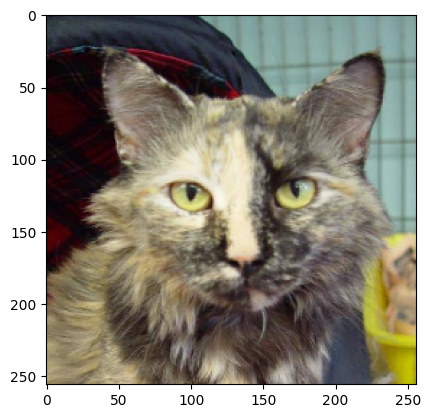

In [ ]:
plt.imshow(test)

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
# Convert the image to a NumPy array
img_array = img_to_array(img)  # Shape: (256, 256, 3)
# Rescale the image (optional, normalize pixel values to [0, 1])
img_array = img_array / 255.0  # Scale pixel values
# Expand dimensions to make it a batch (1, 256, 256, 3)
img_batch = np.expand_dims(img_array, axis=0)

print("Image batch shape:", img_batch.shape)

Image batch shape: (1, 256, 256, 3)


In [ ]:
model.predict(img_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[0.]], dtype=float32)

In [ ]:
predictions = model.predict(img_batch)

# If the model uses softmax, get the class with the highest probability
predicted_class = np.argmax(predictions, axis=-1)

print("Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: [0]


In [ ]:
if predictions[0][0] > 0.5:  # Threshold for sigmoid
    print("Predicted class: Dog")
else:
    print("Predicted class: Cat")

Predicted class: Cat
